In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS Satyam/Projects/My Projects /Laptop Price Predictor/Laptop.csv')

In [ ]:
data.head()

,Column1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
data.isnull().sum()

Column1             0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
data.duplicated().sum()

0

## Feature Engineering

In [ ]:
data.columns

Index(['Column1', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
data=data.drop(columns=['Column1'])

In [ ]:
data.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [ ]:
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [ ]:
# Ram Column- Remove GB and Make integer
data['Ram']=data['Ram'].str.split('GB',expand=True)[0].astype(int)

In [ ]:
# Weight Column- Remove kg and Make Float
data['Weight']=data['Weight'].str.split('kg',expand=True)[0].astype(float)

[]

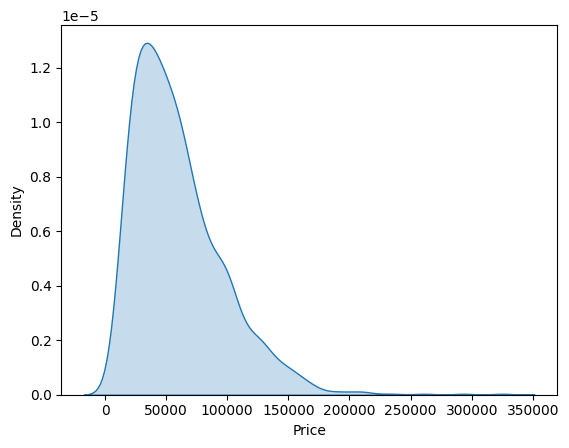

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(data['Price'],fill=True)
plt.plot()

In [ ]:
data.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


## EDA

In [ ]:
data['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

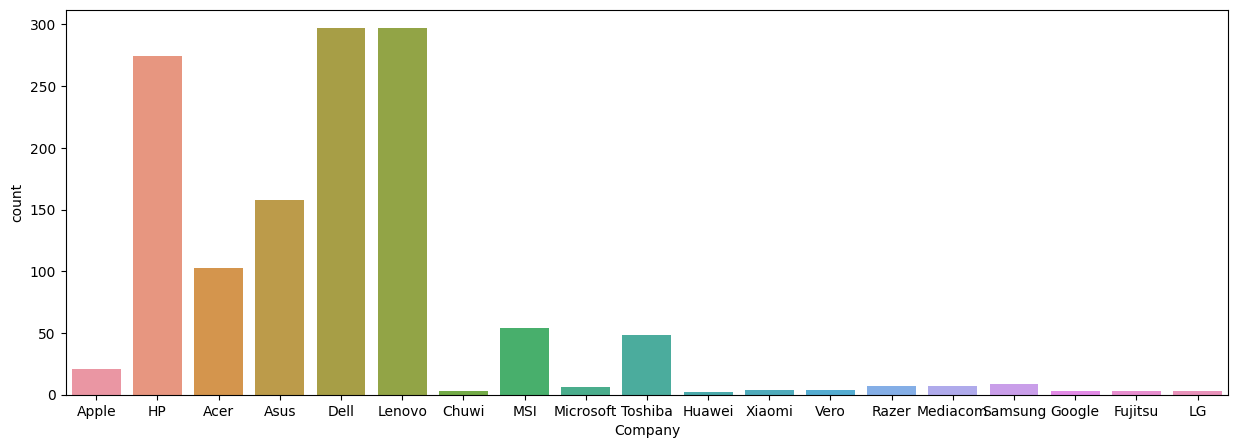

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['Company'])
plt.show()

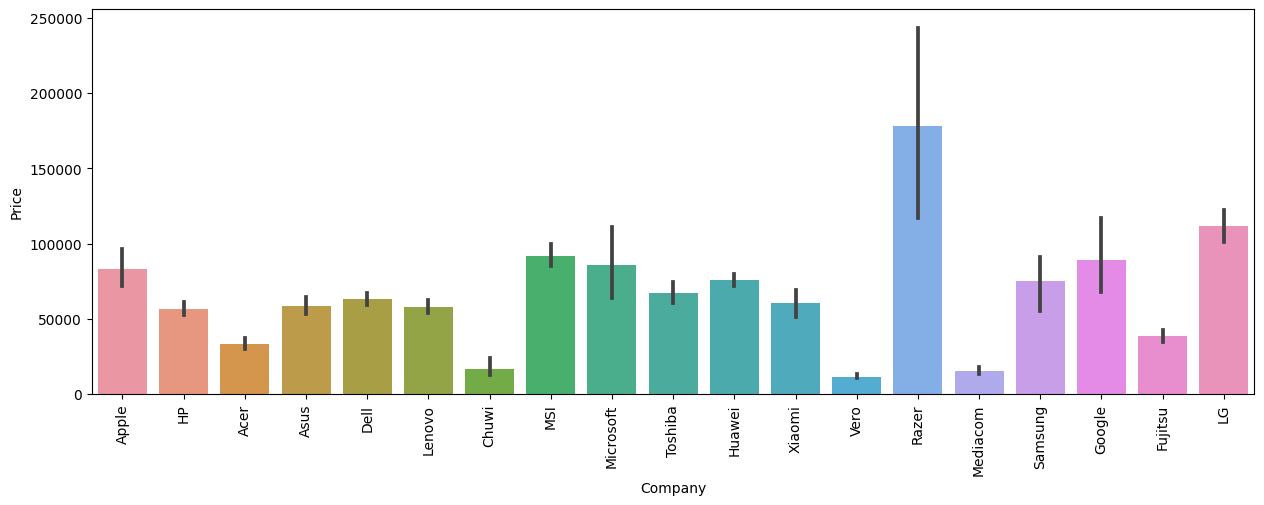

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation=90)
plt.show()

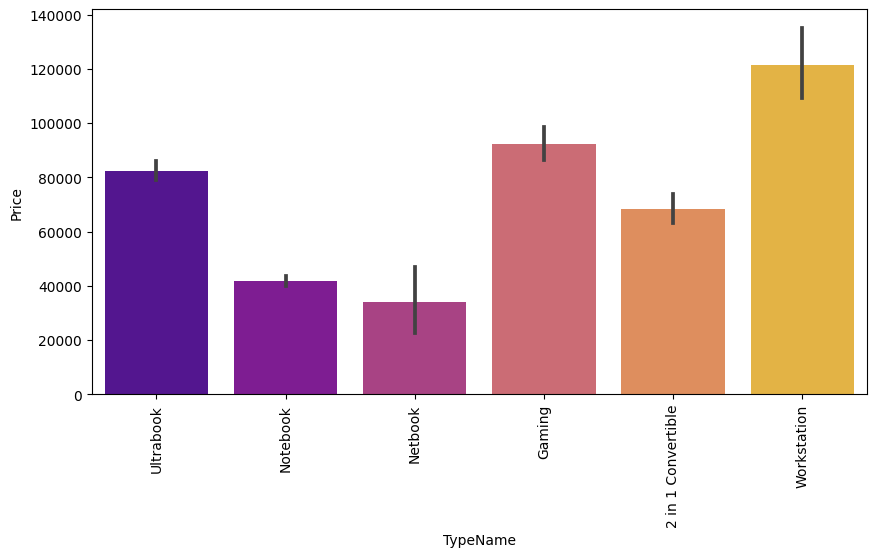

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=data['TypeName'],y=data['Price'],palette='plasma')
plt.xticks(rotation=90)
plt.show()

### Preprocessing in ScreenResolution Column

In [ ]:
def touchscreen(x):
  if 'Touchscreen' in x:
    return 1
  else:
    return 0


In [ ]:
data['Touchscreen']=data['ScreenResolution'].apply(touchscreen)

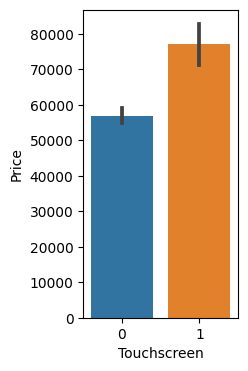

In [ ]:
plt.figure(figsize=(2,4))
sns.barplot(x=data['Touchscreen'],y=data['Price'])
plt.show()

In [ ]:
def ips(x):
  if 'IPS' in x:
    return 1
  else:
    return 0

In [ ]:
data['ips']=data['ScreenResolution'].apply(ips)

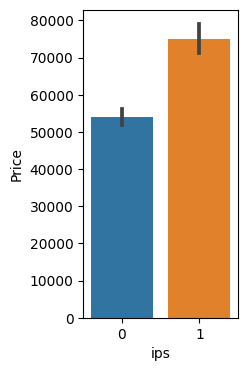

In [ ]:
plt.figure(figsize=(2,4))
sns.barplot(x=data['ips'],y=data['Price'])
plt.show()

In [ ]:
data['y_resolution']=data['ScreenResolution'].str.split('x',expand=True)[[1]]


In [ ]:
data['x_resolution']=data['ScreenResolution'].str.split('x',expand=True)[[0]]

In [ ]:
data['x_resolution']=data['x_resolution'].str.extract('(\d+)')

In [ ]:
data['y_resolution']=data['y_resolution'].astype(int)
data['x_resolution']=data['x_resolution'].astype(int)

In [ ]:
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
Touchscreen           int64
ips                   int64
y_resolution          int64
x_resolution          int64
dtype: object

In [ ]:
data.corr()['Price']

<ipython-input-29-6b59db53f049>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
ips             0.252208
y_resolution    0.552809
x_resolution    0.083832
Name: Price, dtype: float64

In [ ]:
data['ppi']=((data['x_resolution']**2)+(data['y_resolution']**2))**0.5/data['Inches']

In [ ]:
data.corr()['Price']

<ipython-input-31-6b59db53f049>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
ips             0.252208
y_resolution    0.552809
x_resolution    0.083832
ppi             0.348331
Name: Price, dtype: float64

In [ ]:
data=data.drop(columns=['y_resolution','x_resolution','Inches','ScreenResolution'])

### Preprocessing in CPU Column

In [ ]:
data['Cpu'].value_counts()[data['Cpu'].value_counts()>5]

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
Intel Core i5 6200U 2.3GHz               68
Intel Core i3 6006U 2GHz                 64
Intel Core i7 6500U 2.5GHz               49
Intel Core i7 6700HQ 2.6GHz              43
Intel Core i3 7100U 2.4GHz               37
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     28
Intel Core i7 6600U 2.6GHz               18
Intel Core i3 6006U 2.0GHz               16
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i5 7300U 2.6GHz               14
Intel Core i7 7600U 2.8GHz               13
Intel Pentium Quad Core N3710 1.6GHz     11
AMD A9-Series 9420 3GHz                  11
Intel Core i5 6300U 2.4GHz               11
Intel Celeron Dual Core N3050 1.6GHz     11
Intel Core i7 6820HK 2.7GHz     

In [ ]:
def fetch_cpu(x):
  if 'Intel Core i5' in x:
    return 'Intel Core i5'
  if 'Intel Core i3' in x:
    return 'Intel Core i3'
  if 'Intel Core i7' in x:
    return 'Intel Core i7'
  if 'Intel Celeron' in x:
    return 'Intel Celeron'
  if 'Intel Pentium' in x:
    return 'Intel Pentium'
  if 'AMD' in x:
    return 'AMD'
  if 'Intel Core M' in x:
    return 'Intel Core M'
  if 'Intel Xeon' in x:
    return 'Intel Xeon'
  if 'Intel Atom' in x:
    return 'Intel Atom'
  else:
    return 'other'

In [ ]:
data['Cpu_name']=data['Cpu'].apply(fetch_cpu)

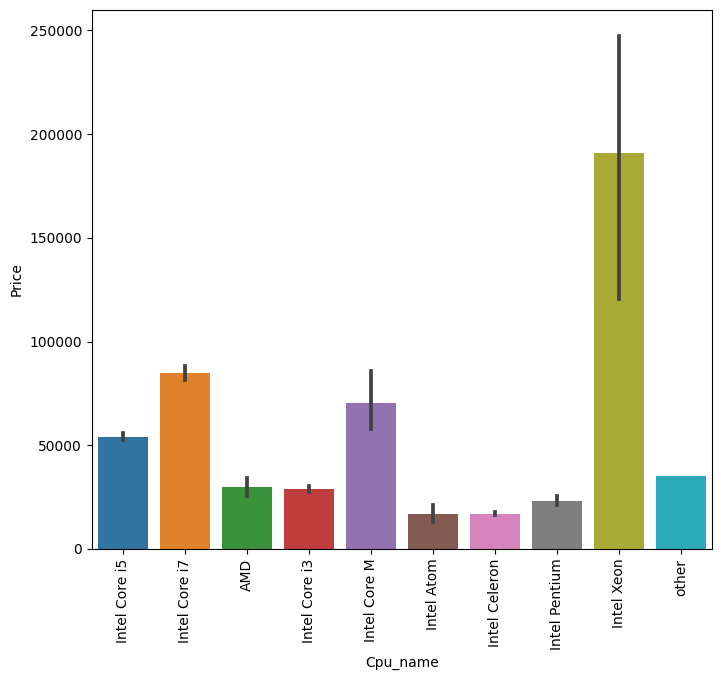

In [ ]:
plt.figure(figsize=(8,7))
sns.barplot(x=data['Cpu_name'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
data['Cpu_name'].value_counts()

Intel Core i7    527
Intel Core i5    423
Intel Core i3    136
Intel Celeron     88
AMD               62
Intel Pentium     30
Intel Core M      19
Intel Atom        13
Intel Xeon         4
other              1
Name: Cpu_name, dtype: int64

In [ ]:
data=data.drop(columns=['Cpu'])

### Preprocessing in Operating System

In [ ]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [ ]:
def fetchos(os):
    if 'Windows' in os:
        os='windows'
    else:
        if os=='macOS' or os=='Mac OS X':
            os='Mac'
        else:
            os='other'
    return os


In [ ]:
data['OpSystem']=data['OpSys'].apply(fetchos)

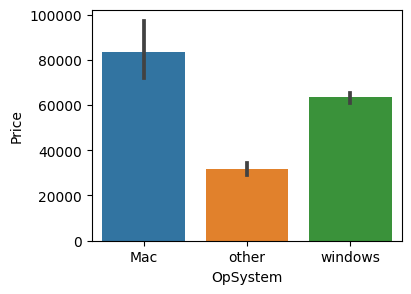

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(x=data['OpSystem'],y=data['Price'])
plt.show()

In [ ]:
data=data.drop(columns=['OpSys'])

### Preprocessing in GPU Column

In [ ]:
data['Gpu']=data['Gpu'].str.split(' ',expand=True)[0]

In [ ]:
data=data[data['Gpu']!='ARM'].reset_index(drop=True)

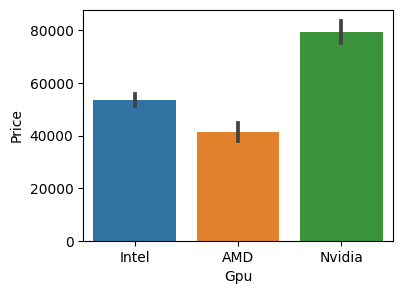

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(x=data['Gpu'],y=data['Price'])
plt.show()

### Preprocessing in Memory Column

In [ ]:
data['Memory1']=data['Memory']

In [ ]:
data['Memory1'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
data['Memory1']=data['Memory1'].str.replace('GB','')

In [ ]:
data['Memory1']=data['Memory1'].str.replace('TB','000')

In [ ]:
data['Memory1']=data['Memory1'].str.replace('1.0000 Hybrid','1000 Hybrid')

<ipython-input-51-e4c1fcaaba91>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Memory1']=data['Memory1'].str.replace('1.0000 Hybrid','1000 Hybrid')


In [ ]:
data['Memory1']=data['Memory1'].str.replace('1.0000 HDD','1000 HDD')

<ipython-input-52-e46273ab3ea2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Memory1']=data['Memory1'].str.replace('1.0000 HDD','1000 HDD')


In [ ]:
data['Memory1']=data['Memory1'].str.replace('1000 HDD +  1000 HDD','2000 HDD')

<ipython-input-53-05917c8c634e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Memory1']=data['Memory1'].str.replace('1000 HDD +  1000 HDD','2000 HDD')


In [ ]:
data['Memory1'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 37
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [ ]:
memory=data['Memory1'].str.split('+',expand=True)

In [ ]:
memory['First']=memory[0].str.strip()

In [ ]:
memory['second']=memory[1].str.strip()

In [ ]:
memory.drop(columns=[0,1],inplace=True)

In [ ]:
memory['Layer1SSD']=memory['First'].apply(lambda x:1 if 'SSD' in x else 0)
memory['Layer1HHD']=memory['First'].apply(lambda x:1 if 'HDD' in x else 0)
memory['LayerFlash']=memory['First'].apply(lambda x:1 if 'Flash Storage' in x else 0)
memory['Layerhybrid']=memory['First'].apply(lambda x:1 if 'Hybrid' in x else 0)

In [ ]:
memory['value']=memory['First'].str.extract('(\d+)').astype(int)

In [ ]:
memory['Layer1SSD']=memory['Layer1SSD']*memory['value']
memory['Layer1HHD']=memory['Layer1HHD']*memory['value']
memory['LayerFlash']=memory['LayerFlash']*memory['value']
memory['Layerhybrid']=memory['Layerhybrid']*memory['value']

In [ ]:
memory['second'].fillna(value='0',inplace=True)

In [ ]:
memory['secondSSD']=memory['second'].apply(lambda x:1 if 'SSD' in x else 0)
memory['secondHHD']=memory['second'].apply(lambda x:1 if 'HDD' in x else 0)
memory['secondFlash']=memory['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)
memory['secondhybrid']=memory['second'].apply(lambda x:1 if 'Hybrid' in x else 0)

In [ ]:
memory=memory.drop(columns=['First','value'])

In [ ]:
memory['second']=memory['second'].str.extract('(\d+)').astype(int)

In [ ]:
memory['secondSSD']=memory['secondSSD']*memory['second']
memory['secondHHD']=memory['secondHHD']*memory['second']
memory['secondFlash']=memory['secondFlash']*memory['second']
memory['secondhybrid']=memory['secondhybrid']*memory['second']


In [ ]:
memory['SSD']=memory['Layer1SSD']+memory['secondSSD']
memory['HHD']=memory['Layer1HHD']+memory['secondHHD']
memory['Flash']=memory['LayerFlash']+memory['secondFlash']
memory['Hybrid']=memory['Layerhybrid']+memory['secondhybrid']

In [ ]:
memory=memory.loc[:,['SSD','HHD','Flash','Hybrid']]

In [ ]:
memory.head(3)

,SSD,HHD,Flash,Hybrid
0,128,0,0,0
1,0,0,128,0
2,256,0,0,0


In [ ]:
memory['Memory1']=data['Memory1']

In [ ]:
memory['Index']=memory.index

In [ ]:
data['Index']=data.index

In [ ]:
data=pd.merge(data,memory,on='Index')

In [ ]:
data.sample(5)

,Company,TypeName,Ram,Memory,Gpu,Weight,Price,Touchscreen,ips,ppi,Cpu_name,OpSystem,Memory1_x,Index,SSD,HHD,Flash,Hybrid,Memory1_y
1146,HP,Ultrabook,8,256GB SSD,Intel,1.26,122381.4960,0,0,176.232574,Intel Core i7,windows,256 SSD,1146,256,0,0,0,256 SSD
1113,HP,Ultrabook,8,512GB SSD,Intel,1.16,104908.3200,0,0,165.632118,Intel Core i7,windows,512 SSD,1113,512,0,0,0,512 SSD
789,Dell,Gaming,8,256GB SSD,Nvidia,2.62,52480.8000,0,0,141.211998,Intel Core i5,windows,256 SSD,789,256,0,0,0,256 SSD
1034,HP,Notebook,8,256GB SSD,Intel,1.84,65480.5872,0,0,141.211998,Intel Core i7,windows,256 SSD,1034,256,0,0,0,256 SSD
831,Lenovo,Ultrabook,16,512GB SSD,Intel,1.10,111834.7200,0,1,209.800683,Intel Core i7,windows,512 SSD,831,512,0,0,0,512 SSD


In [ ]:
data.drop(columns=['Memory1_x','Index','Memory1_y'],inplace=True)

In [ ]:
data.corr()['Price']

<ipython-input-76-6b59db53f049>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
ips            0.253320
ppi            0.350885
SSD            0.670660
HHD           -0.096891
Flash         -0.040067
Hybrid         0.007942
Name: Price, dtype: float64

In [ ]:
data=data.drop(columns=['Memory','Flash','Hybrid'])

In [ ]:
data.dtypes

Company         object
TypeName        object
Ram              int64
Gpu             object
Weight         float64
Price          float64
Touchscreen      int64
ips              int64
ppi            float64
Cpu_name        object
OpSystem        object
SSD              int64
HHD              int64
dtype: object

### Preprocessing in Price Column

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt=PowerTransformer()

In [ ]:
y_trans=pt.fit_transform(data[['Price']])

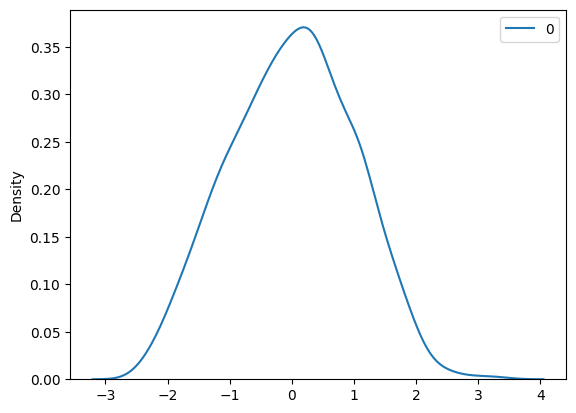

In [ ]:
sns.kdeplot(y_trans)
plt.show()

In [ ]:
pt.inverse_transform([['0.55638157']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[71378.68326795]])

### train test split

In [ ]:
x=data.drop(columns=['Price'])

In [ ]:
y=y_trans

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1106, 12)
(196, 12)
(1106, 1)
(196, 1)


### Model Building

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


In [ ]:
# LinearRegression
step1=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','Cpu_name','Gpu','OpSystem'])
],remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print(r2_score(y_test,y_pred))


0.8186771840964746


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# RandomForest
step1=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','Cpu_name','Gpu','OpSystem'])
],remainder='passthrough')

step2=RandomForestRegressor()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print(r2_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.8882709136389315


In [ ]:
# KNeighbors
step1=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','Cpu_name','Gpu','OpSystem'])
],remainder='passthrough')

step2=KNeighborsRegressor(n_neighbors=3)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print(r2_score(y_test,y_pred))

0.798928637653687


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# DecisionTree
step1=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','Cpu_name','Gpu','OpSystem'])
],remainder='passthrough')

step2=DecisionTreeRegressor()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print(r2_score(y_test,y_pred))

0.7967929143330946


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# XGBoost
step1=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','Cpu_name','Gpu','OpSystem'])
],remainder='passthrough')

step2=XGBRegressor()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print(r2_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8770788027385573
